In [1]:
# Import required libraries

import ast
import json

# Libraries used to handle DataFrames
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# NLP libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Machine Learning libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Reading IMDB movies data
# low_memory=False is used to remove the warnings
movies_df = pd.read_csv("data/imdb/IMDb movies.csv", low_memory=False)

In [3]:
movies_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [5]:
# year column is of object type, we have to convert it to numeric
movies_df[['year']] = movies_df[['year']].apply(pd.to_numeric, errors='coerce') # Using errors='coerce' to convert String to NaN without giving error

In [6]:
# Display some Indian movies
movies_df[(movies_df["country"] == "India") & (movies_df["year"] > 2000) & (movies_df["year"] < 2010)]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
30345,tt0118578,Albela,Albela,2001.0,2001-04-20,"Comedy, Drama, Romance",145,India,Hindi,Deepak Sareen,...,"Govinda, Aishwarya Rai Bachchan, Jackie Shroff...","Tony (Govinda) works as a guide, helping touri...",3.7,695,NaN,NaN,NaN,NaN,7.0,1.0
34269,tt0169102,Lagaan - C'era una volta in India,Lagaan: Once Upon a Time in India,2001.0,2002-08-23,"Adventure, Drama, Musical",224,India,Hindi,Ashutosh Gowariker,...,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",The people of a small village in Victorian Ind...,8.1,102618,$ 6000000,$ 909043,$ 1724806,84.0,286.0,77.0
35322,tt0187279,Meri Biwi Ka Jawab Nahin,Meri Biwi Ka Jawab Nahin,2004.0,2004-07-02,"Action, Comedy, Romance",150,India,Hindi,"Pankaj Parashar, S.M. Iqbal",...,"Akshay Kumar, Sridevi, Gulshan Grover, Laxmika...",Ajay gets married to his childhood friend Durg...,3.9,654,NaN,NaN,NaN,NaN,3.0,1.0
36286,tt0205380,Sanam Teri Kasam,Sanam Teri Kasam,2009.0,2009-05-22,"Action, Drama, Romance",170,India,"Hindi, English",Lawrence D'Souza,...,"Saif Ali Khan, Atul Agnihotri, Pooja Bhatt, Sh...",A love triangle forms after a male finds his b...,5.0,136,NaN,NaN,NaN,NaN,2.0,1.0
37086,tt0222024,Hum Tumhare Hain Sanam,Hum Tumhare Hain Sanam,2002.0,2002-05-24,"Drama, Romance",174,India,Hindi,K.S. Adiyaman,...,"Shah Rukh Khan, Madhuri Dixit, Salman Khan, At...",Gopal's blissful married life with Radha blemi...,5.4,6317,NaN,NaN,$ 899867,NaN,18.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76308,tt4960754,Kadhal Sadugudu,Kadhal Sadugudu,2003.0,2003-04-13,"Action, Drama",138,India,"Hindi, Tamil, Telugu",V.Z. Dhorai,...,"Vikram, Priyanka Upendra, Prakash Raj, Alphons...",A man who does everything unintentionally is m...,5.7,146,NaN,NaN,NaN,NaN,1.0,9.0
77876,tt5508936,Vamshi,Vamshi,2008.0,2008-10-02,"Action, Drama",139,India,Kannada,Prakash,...,"Puneeth Rajkumar, Nikita Thukral, Lakshmi, Avi...","Vamshi, under the eye of his mother is living ...",7.2,193,INR 20000000,NaN,NaN,NaN,NaN,NaN
80393,tt6358182,Unnai Ninaithu,Unnai Ninaithu,2002.0,2002-05-10,Drama,163,India,Tamil,Vikraman,...,"Suriya, Laila, Sneha, Ramesh Khanna, Thalaivas...",A young man tries to explain to his lover that...,6.9,297,INR 2000000,NaN,NaN,NaN,NaN,NaN
81296,tt6832682,Shahjahan,Shahjahan,2001.0,2001-11-14,"Drama, Romance",156,India,Tamil,K.S. Ravi,...,"Joseph Vijay, Balaji, Banu Balasubramaniam, Ch...",Ashok is the guy people turn to for love advic...,6.7,377,NaN,NaN,NaN,NaN,2.0,NaN


In [7]:
# Now filter movies from USA and India only
movies_df = movies_df[movies_df['country'].str.contains("USA", na=False) | movies_df['country'].str.contains("India", na=False)]

# Also filter movies with English and Hindi as their language
# movies_df = movies_df[movies_df['language'].str.contains("English", na=False) | movies_df['language'].str.contains("Hindi", na=False) | movies_df['language'].str.contains("Telugu", na=False)]
movies_df = movies_df[movies_df['language'].str.contains("English", na=False) | movies_df['language'].str.contains("Hindi", na=False)]

# Filter movies which have came after or in year 1970 to reduce dataframe size
movies_df = movies_df[movies_df['year'] >= 1970]

movies_df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
4334,tt0035423,Kate & Leopold,Kate & Leopold,2001.0,2002-03-01,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",An English Duke from 1876 is inadvertedly drag...,6.4,77852,$ 48000000,$ 47121859,$ 76019048,44.0,341.0,115.0
10630,tt0054724,Zombie,Zombie,1971.0,1971-10-29,Horror,92,USA,English,Del Tenney,...,"William Joyce, Heather Hewitt, Walter Coy, Dan...",A cancer researcher on a remote Caribbean isla...,3.5,1214,NaN,NaN,NaN,NaN,56.0,40.0
12814,tt0060951,A Scream in the Streets,A Scream in the Streets,1973.0,1973-11-01,"Action, Crime",96,USA,English,"Carl Monson, Dwayne Avery",...,"Joshua Bryant, Frank Bannon, Rosie Stone, Lind...",Two Los Angeles detectives are assigned to tra...,4.7,233,NaN,NaN,NaN,NaN,10.0,12.0
13015,tt0061592,Doomsday Machine,Doomsday Machine,1972.0,1972,Sci-Fi,83,USA,English,"Harry Hope, Lee Sholem",...,"Bobby Van, Ruta Lee, Mala Powers, James Craig,...",Spies discover that the Red Chinese have built...,2.5,951,NaN,NaN,NaN,NaN,44.0,16.0
13397,tt0062730,The Big Snatch,The Big Snatch,1971.0,1971-06-01,"Crime, Drama",77,USA,English,"Dan Martin, Byron Mabe",...,"Harry Chest, Momo, Peggy Church, Tracy Handfus...",Guy in a pickup truck kidnaps 5 women off the ...,5.0,142,$ 11000,NaN,NaN,NaN,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85812,tt9860860,Abduction 101,Abduction 101,2019.0,2019-06-25,Horror,77,USA,English,"Robin Entreinger, Steve Noir",...,"Luna Labelle, Nixi Oblivion, Brianna Shewbert ...",Three beautiful women find a strange house in ...,2.3,174,$ 500000,NaN,NaN,NaN,14.0,3.0
85830,tt9887580,Bulletproof 2,Bulletproof 2,2020.0,2020-01-07,"Action, Comedy",97,USA,English,Don Michael Paul,...,"Faizon Love, Kirk Fox, Tony Todd, Cassie Clare...","Set 25 years after, Jack is now working as a S...",3.5,326,NaN,NaN,NaN,NaN,18.0,5.0
85837,tt9894470,VFW,VFW,2019.0,2020-02-14,"Action, Crime, Horror",92,USA,English,Joe Begos,...,"Stephen Lang, William Sadler, Fred Williamson,...",A group of old war veterans put their lives on...,6.1,4178,NaN,NaN,$ 23101,72.0,83.0,94.0
85838,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019.0,2019-04-18,"Animation, Adventure, Family",108,USA,English,Robert Fernandez,...,"David Thorpe, John Rhys-Davies, Kristyn Getty,...","An epic journey, faithfully adapted to modern-...",5.7,442,NaN,$ 1294596,$ 3173282,NaN,28.0,3.0


In [8]:
# Filtering on those movies whose have at least 900 votes(this step is also done to reduce size and get some meaningful movies)
# Ignoring year 2020, because this dataset was made in year 2020 only so many 2020 updates are here
movies_df = movies_df.loc[((movies_df['votes']>=900) & (movies_df['year'] < 2020)) | (movies_df['year']== 2020)]
movies_df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
4334,tt0035423,Kate & Leopold,Kate & Leopold,2001.0,2002-03-01,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",An English Duke from 1876 is inadvertedly drag...,6.4,77852,$ 48000000,$ 47121859,$ 76019048,44.0,341.0,115.0
10630,tt0054724,Zombie,Zombie,1971.0,1971-10-29,Horror,92,USA,English,Del Tenney,...,"William Joyce, Heather Hewitt, Walter Coy, Dan...",A cancer researcher on a remote Caribbean isla...,3.5,1214,NaN,NaN,NaN,NaN,56.0,40.0
13015,tt0061592,Doomsday Machine,Doomsday Machine,1972.0,1972,Sci-Fi,83,USA,English,"Harry Hope, Lee Sholem",...,"Bobby Van, Ruta Lee, Mala Powers, James Craig,...",Spies discover that the Red Chinese have built...,2.5,951,NaN,NaN,NaN,NaN,44.0,16.0
13914,tt0064177,Colossus: The Forbin Project,Colossus: The Forbin Project,1970.0,1970-04-08,"Sci-Fi, Thriller",100,USA,"English, Russian",Joseph Sargent,...,"Eric Braeden, Susan Clark, Gordon Pinsent, Wil...","Thinking this will prevent war, the US governm...",7.1,7989,NaN,NaN,NaN,NaN,114.0,48.0
14013,tt0064437,I killers della luna di miele,The Honeymoon Killers,1970.0,1970-10-16,"Crime, Drama, Romance",107,USA,English,"Leonard Kastle, Donald Volkman",...,"Shirley Stoler, Tony Lo Bianco, Mary Jane Higb...","An obese, embittered nurse doesn't mind if her...",7.0,4305,$ 150000,NaN,NaN,82.0,69.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85791,tt9831136,The Banana Splits Movie,The Banana Splits Movie,2019.0,2019-08-13,"Comedy, Horror, Sci-Fi",89,"USA, South Africa, Canada",English,Danishka Esterhazy,...,"Dani Kind, Steve Lund, Celina Martin, Finlay W...",A family attends a live taping of The Banana S...,5.0,2373,NaN,NaN,NaN,NaN,124.0,59.0
85811,tt9860728,Falling Inn Love - Ristrutturazione con amore,Falling Inn Love,2019.0,2019-08-29,"Comedy, Romance",98,USA,English,Roger Kumble,...,"Christina Milian, Adam Demos, Jeffrey Bowyer-C...",When city girl Gabriela spontaneously enters a...,5.6,14108,NaN,NaN,NaN,NaN,265.0,32.0
85830,tt9887580,Bulletproof 2,Bulletproof 2,2020.0,2020-01-07,"Action, Comedy",97,USA,English,Don Michael Paul,...,"Faizon Love, Kirk Fox, Tony Todd, Cassie Clare...","Set 25 years after, Jack is now working as a S...",3.5,326,NaN,NaN,NaN,NaN,18.0,5.0
85837,tt9894470,VFW,VFW,2019.0,2020-02-14,"Action, Crime, Horror",92,USA,English,Joe Begos,...,"Stephen Lang, William Sadler, Fred Williamson,...",A group of old war veterans put their lives on...,6.1,4178,NaN,NaN,$ 23101,72.0,83.0,94.0


In [9]:
# Display year wise movie counts
movies_df.year.value_counts().sort_index()

1970.0     82
1971.0    104
1972.0     94
1973.0     94
1974.0     87
1975.0     83
1976.0     87
1977.0     92
1978.0     92
1979.0    100
1980.0    122
1981.0    128
1982.0    133
1983.0    124
1984.0    148
1985.0    155
1986.0    168
1987.0    196
1988.0    216
1989.0    203
1990.0    209
1991.0    215
1992.0    197
1993.0    230
1994.0    225
1995.0    243
1996.0    255
1997.0    280
1998.0    273
1999.0    279
2000.0    291
2001.0    302
2002.0    326
2003.0    284
2004.0    319
2005.0    405
2006.0    451
2007.0    461
2008.0    429
2009.0    470
2010.0    404
2011.0    452
2012.0    491
2013.0    554
2014.0    558
2015.0    545
2016.0    572
2017.0    566
2018.0    548
2019.0    473
2020.0    352
Name: year, dtype: int64

<AxesSubplot:>

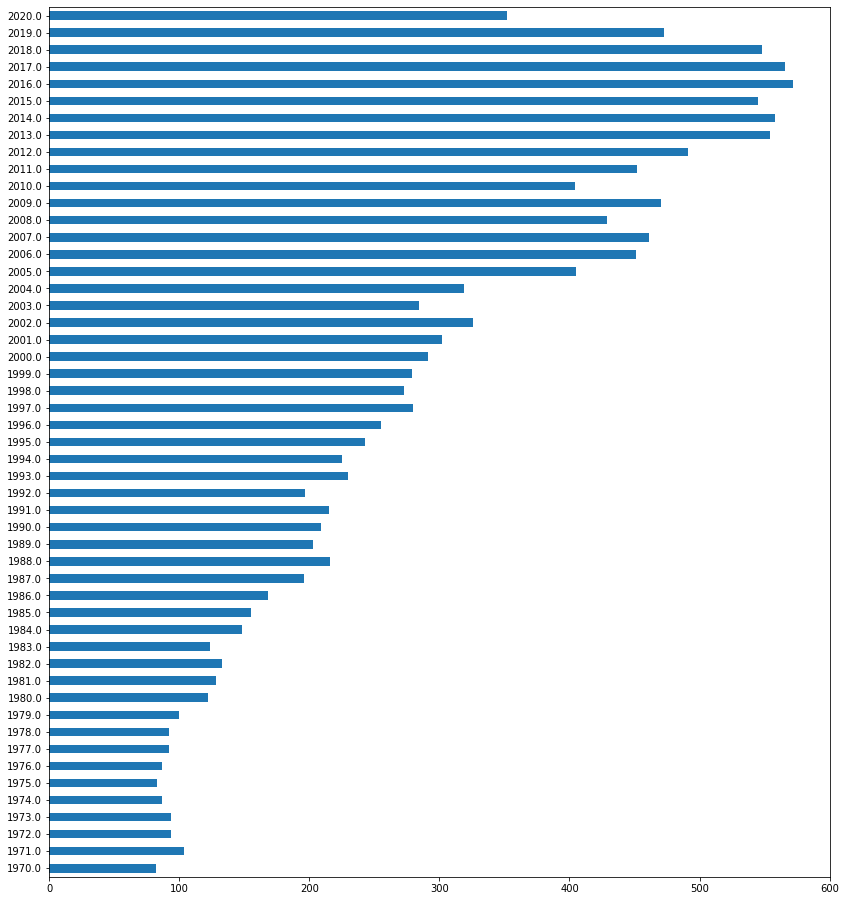

In [10]:
# Histogram of year wise movies
movies_df.year.value_counts(dropna=False).sort_index().plot(kind='barh', figsize=(14,16))

In [11]:
print("Existing count of movies: ", movies_df.shape[0])
movies_df["year"].isnull().any() # print True
# movies_df = movies_df[df['EPS'].notna()]

Existing count of movies:  14167


False

In [12]:
# Read movie ratings data 
ratings_df = pd.read_csv("data/imdb/IMDb ratings.csv")
print(ratings_df.columns)
ratings_df.head()

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [13]:
print("Ratings DataFrame count: ", ratings_df.shape[0])

Ratings DataFrame count:  85855


In [14]:
# Join movie and rating dataframe based on `imdb_title_id` column
df = movies_df.merge(ratings_df, on="imdb_title_id", how="inner")
print("Movies DF count after join with rating DF: ", df.shape[0])
df.head()

Movies DF count after join with rating DF:  14167


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0035423,Kate & Leopold,Kate & Leopold,2001.0,2002-03-01,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,6.5,15654.0,6.7,3753.0,6.1,468.0,6.4,14831.0,6.3,38534.0
1,tt0054724,Zombie,Zombie,1971.0,1971-10-29,Horror,92,USA,English,Del Tenney,...,3.4,58.0,3.8,36.0,3.0,94.0,3.6,591.0,3.3,350.0
2,tt0061592,Doomsday Machine,Doomsday Machine,1972.0,1972,Sci-Fi,83,USA,English,"Harry Hope, Lee Sholem",...,3.0,23.0,3.1,36.0,2.6,99.0,2.7,455.0,2.3,315.0
3,tt0064177,Colossus: The Forbin Project,Colossus: The Forbin Project,1970.0,1970-04-08,"Sci-Fi, Thriller",100,USA,"English, Russian",Joseph Sargent,...,7.3,176.0,7.2,192.0,6.5,235.0,7.4,2147.0,7.0,3592.0
4,tt0064437,I killers della luna di miele,The Honeymoon Killers,1970.0,1970-10-16,"Crime, Drama, Romance",107,USA,English,"Leonard Kastle, Donald Volkman",...,7.1,219.0,7.3,210.0,6.4,217.0,7.1,1520.0,7.0,1781.0


## Using Weighted Average:

**Here we will calculate rating for movie using a techinique called weighted average**

IMDB follows weighted average rating method instead of just average rating:

* https://help.imdb.com/article/imdb/track-movies-tv/weighted-average-ratings/GWT2DSBYVT2F25SK?ref_=helpsect_cons_2_8#
* http://trailerpark.weebly.com/imdb-rating.html?source=post_page


![Weighted Average Rating Formula](images/wt_avg_rat.png)

We can calculate our manual weighted average using this below logic:

In [15]:
v = df["total_votes"]
R = df["mean_vote"]
C = df["mean_vote"].mean()
m = df["total_votes"].quantile(0.70) # Should have more than 70% of votes
df["wa"] = ((R*v)+(C*m))/(v+m)
# Display movies in descending order of calculated weighted average
df[["imdb_title_id", "original_title", "weighted_average_vote", "wa"]].sort_values('wa', ascending=False)
# movies_sorted[["title", "year"]]

,imdb_title_id,original_title,weighted_average_vote,wa
3496,tt0111161,The Shawshank Redemption,9.3,9.070332
7406,tt0468569,The Dark Knight,9.0,8.871936
226,tt0068646,The Godfather,9.2,8.860176
4888,tt0167260,The Lord of the Rings: The Return of the King,8.9,8.762405
402,tt0071562,The Godfather: Part II,9.0,8.745471
...,...,...,...,...
5005,tt0185183,Battlefield Earth,2.5,3.542599
7844,tt0799949,Epic Movie,2.4,3.369089
9006,tt1213644,Disaster Movie,1.9,3.301416
11425,tt2574698,Gunday,2.4,3.231509


In [16]:
# Selecting only required columns and sorting them by calculated weighted average
df1 = df[["imdb_title_id", "original_title", "weighted_average_vote", "wa", "country", "year"]]
df1.sort_values('wa', ascending=False)

,imdb_title_id,original_title,weighted_average_vote,wa,country,year
3496,tt0111161,The Shawshank Redemption,9.3,9.070332,USA,1994.0
7406,tt0468569,The Dark Knight,9.0,8.871936,"USA, UK",2008.0
226,tt0068646,The Godfather,9.2,8.860176,USA,1972.0
4888,tt0167260,The Lord of the Rings: The Return of the King,8.9,8.762405,"New Zealand, USA",2003.0
402,tt0071562,The Godfather: Part II,9.0,8.745471,USA,1974.0
...,...,...,...,...,...,...
5005,tt0185183,Battlefield Earth,2.5,3.542599,USA,2000.0
7844,tt0799949,Epic Movie,2.4,3.369089,USA,2007.0
9006,tt1213644,Disaster Movie,1.9,3.301416,USA,2008.0
11425,tt2574698,Gunday,2.4,3.231509,India,2014.0


In [17]:
df1[df1["original_title"].str.lower() == "joKer".lower()]

,imdb_title_id,original_title,weighted_average_vote,wa,country,year
10499,tt1918886,Joker,2.4,5.730215,India,2012.0
13710,tt7286456,Joker,8.5,8.438445,"USA, Canada",2019.0


In [18]:
# We will be selected our created weighted average instead of given average as we can see using our weighted average we are getting more relevant results on top
df1 = df1[["imdb_title_id", "wa"]]
df1.rename(columns = {'wa':'weighted_average'}, inplace = True)
df1

,imdb_title_id,weighted_average
0,tt0035423,6.510685
1,tt0054724,6.094585
2,tt0061592,6.085411
3,tt0064177,6.490249
4,tt0064437,6.352969
...,...,...
14162,tt9831136,6.115562
14163,tt9860728,6.024230
14164,tt9887580,6.187170
14165,tt9894470,6.199683


## Using Content based filtering:

In [19]:
# First we will process description column

def convert_list_to_string(row):
    """
    - Function to convert list to string
    - Selects only words
    """
    final_str = ""
    for word in row:
        # print(row,"\n")
        if word:
            final_str += word + " "
    return final_str


# Fill NaN values with '', also don't update orginal description, we will be using it to display description about movie in front end
movies_df["description"] = movies_df.description.fillna('')

# Tokenize and then remove stopwords
eng_stopwords = stopwords.words('english') 
movies_df['desc'] = movies_df['description'].apply(word_tokenize)
movies_df['desc'] = movies_df['desc'].apply(lambda words: [word for word in words if word not in eng_stopwords])

# Get only useful words
movies_df['desc'] = movies_df['desc'].apply(convert_list_to_string)

# Remove extra punctuations
movies_df["desc"] = movies_df['desc'].str.replace('[^\w\s]','')

/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [20]:
################## Processing rest of the columns describing a movie #################

# Original Title, Genre, Country, Language, Director, Actors, Description, Reviews from users 

# Convert actors and director to String first as directly splitting is giving error
movies_df['actors'] = movies_df['actors'].astype(str)
movies_df['director'] = movies_df['director'].astype(str)

# Now convert string to List and create new column like actor1, actor2, actor3
movies_df["actors"] = movies_df["actors"].apply(lambda x: x.split(','))
movies_df["actor1"] = movies_df["actors"].str[0].str.strip()
movies_df["actor2"] = movies_df["actors"].str[1].str.strip()
movies_df["actor3"] = movies_df["actors"].str[2].str.strip()

# Using the first director only
movies_df["director"] = movies_df["director"].apply(lambda x: x.split(',')).str[0].str.strip()

# Creating a new column of genres which will be used in storing a movie content
movies_df["gen"] = movies_df["genre"].apply(lambda x: " ".join(x.split(",")))


# Creating the column which will have no NaN values and will be used in metadata
movies_df["actor1_"] = movies_df.actor1.fillna('')
movies_df["actor2_"] = movies_df.actor2.fillna('')
movies_df["actor3_"] = movies_df.actor3.fillna('')
movies_df["director_"] = movies_df.director.fillna('')
movies_df["gen_"] = movies_df.gen.fillna('')

movies_df['metadata'] = movies_df['actor1_'] + ' ' + movies_df['actor2_'] + ' '+ movies_df['actor3_'] + ' '+ movies_df['director_'] + ' ' + movies_df['gen_'] + ' ' + movies_df['desc']
# movies_df['metadata_'] = movies_df['actor1'] + ', ' + movies_df['actor2'] + ', '+ movies_df['actor3'] + ', '+ movies_df['director'] + ', ' + movies_df['gen']
df2 = movies_df.loc[:, ['imdb_title_id', 'original_title', 'year', 'actor1', 'actor2', 'actor3', 'director', 'genre', 'description', 'metadata']]
df2 = df2.reset_index()
df2

/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,index,imdb_title_id,original_title,year,actor1,actor2,actor3,director,genre,description,metadata
0,4334,tt0035423,Kate & Leopold,2001.0,Meg Ryan,Hugh Jackman,Liev Schreiber,James Mangold,"Comedy, Fantasy, Romance",An English Duke from 1876 is inadvertedly drag...,Meg Ryan Hugh Jackman Liev Schreiber James Man...
1,10630,tt0054724,Zombie,1971.0,William Joyce,Heather Hewitt,Walter Coy,Del Tenney,Horror,A cancer researcher on a remote Caribbean isla...,William Joyce Heather Hewitt Walter Coy Del Te...
2,13015,tt0061592,Doomsday Machine,1972.0,Bobby Van,Ruta Lee,Mala Powers,Harry Hope,Sci-Fi,Spies discover that the Red Chinese have built...,Bobby Van Ruta Lee Mala Powers Harry Hope Sci-...
3,13914,tt0064177,Colossus: The Forbin Project,1970.0,Eric Braeden,Susan Clark,Gordon Pinsent,Joseph Sargent,"Sci-Fi, Thriller","Thinking this will prevent war, the US governm...",Eric Braeden Susan Clark Gordon Pinsent Joseph...
4,14013,tt0064437,The Honeymoon Killers,1970.0,Shirley Stoler,Tony Lo Bianco,Mary Jane Higby,Leonard Kastle,"Crime, Drama, Romance","An obese, embittered nurse doesn't mind if her...",Shirley Stoler Tony Lo Bianco Mary Jane Higby ...
...,...,...,...,...,...,...,...,...,...,...,...
14162,85791,tt9831136,The Banana Splits Movie,2019.0,Dani Kind,Steve Lund,Celina Martin,Danishka Esterhazy,"Comedy, Horror, Sci-Fi",A family attends a live taping of The Banana S...,Dani Kind Steve Lund Celina Martin Danishka Es...
14163,85811,tt9860728,Falling Inn Love,2019.0,Christina Milian,Adam Demos,Jeffrey Bowyer-Chapman,Roger Kumble,"Comedy, Romance",When city girl Gabriela spontaneously enters a...,Christina Milian Adam Demos Jeffrey Bowyer-Cha...
14164,85830,tt9887580,Bulletproof 2,2020.0,Faizon Love,Kirk Fox,Tony Todd,Don Michael Paul,"Action, Comedy","Set 25 years after, Jack is now working as a S...",Faizon Love Kirk Fox Tony Todd Don Michael Pau...
14165,85837,tt9894470,VFW,2019.0,Stephen Lang,William Sadler,Fred Williamson,Joe Begos,"Action, Crime, Horror",A group of old war veterans put their lives on...,Stephen Lang William Sadler Fred Williamson Jo...


In [21]:
# Joining weighted average DF so we don't have to join afterwards
df2 = df2.merge(df1, on="imdb_title_id", how="inner")
df2

,index,imdb_title_id,original_title,year,actor1,actor2,actor3,director,genre,description,metadata,weighted_average
0,4334,tt0035423,Kate & Leopold,2001.0,Meg Ryan,Hugh Jackman,Liev Schreiber,James Mangold,"Comedy, Fantasy, Romance",An English Duke from 1876 is inadvertedly drag...,Meg Ryan Hugh Jackman Liev Schreiber James Man...,6.510685
1,10630,tt0054724,Zombie,1971.0,William Joyce,Heather Hewitt,Walter Coy,Del Tenney,Horror,A cancer researcher on a remote Caribbean isla...,William Joyce Heather Hewitt Walter Coy Del Te...,6.094585
2,13015,tt0061592,Doomsday Machine,1972.0,Bobby Van,Ruta Lee,Mala Powers,Harry Hope,Sci-Fi,Spies discover that the Red Chinese have built...,Bobby Van Ruta Lee Mala Powers Harry Hope Sci-...,6.085411
3,13914,tt0064177,Colossus: The Forbin Project,1970.0,Eric Braeden,Susan Clark,Gordon Pinsent,Joseph Sargent,"Sci-Fi, Thriller","Thinking this will prevent war, the US governm...",Eric Braeden Susan Clark Gordon Pinsent Joseph...,6.490249
4,14013,tt0064437,The Honeymoon Killers,1970.0,Shirley Stoler,Tony Lo Bianco,Mary Jane Higby,Leonard Kastle,"Crime, Drama, Romance","An obese, embittered nurse doesn't mind if her...",Shirley Stoler Tony Lo Bianco Mary Jane Higby ...,6.352969
...,...,...,...,...,...,...,...,...,...,...,...,...
14162,85791,tt9831136,The Banana Splits Movie,2019.0,Dani Kind,Steve Lund,Celina Martin,Danishka Esterhazy,"Comedy, Horror, Sci-Fi",A family attends a live taping of The Banana S...,Dani Kind Steve Lund Celina Martin Danishka Es...,6.115562
14163,85811,tt9860728,Falling Inn Love,2019.0,Christina Milian,Adam Demos,Jeffrey Bowyer-Chapman,Roger Kumble,"Comedy, Romance",When city girl Gabriela spontaneously enters a...,Christina Milian Adam Demos Jeffrey Bowyer-Cha...,6.024230
14164,85830,tt9887580,Bulletproof 2,2020.0,Faizon Love,Kirk Fox,Tony Todd,Don Michael Paul,"Action, Comedy","Set 25 years after, Jack is now working as a S...",Faizon Love Kirk Fox Tony Todd Don Michael Pau...,6.187170
14165,85837,tt9894470,VFW,2019.0,Stephen Lang,William Sadler,Fred Williamson,Joe Begos,"Action, Crime, Horror",A group of old war veterans put their lives on...,Stephen Lang William Sadler Fred Williamson Jo...,6.199683


In [54]:
# CountVectorizer converts a collection of text documents to a matrix of token counts: the occurrences of tokens in each document.
# It results in a sparse representation of the counts.
cv = CountVectorizer()
count_matrix = cv.fit_transform(df2['metadata'])
count_matrix

<14167x38443 sparse matrix of type '<class 'numpy.int64'>'
	with 362108 stored elements in Compressed Sparse Row format>

In [55]:
# Using cosine similarity to create score matrix
similarity = cosine_similarity(count_matrix)
similarity

array([[1.        , 0.        , 0.        , ..., 0.03429972, 0.        ,
        0.09607689],
       [0.        , 1.        , 0.        , ..., 0.        , 0.06711561,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03429972, 0.        , 0.        , ..., 1.        , 0.08458258,
        0.10984701],
       [0.        , 0.06711561, 0.        , ..., 0.08458258, 1.        ,
        0.07897472],
       [0.09607689, 0.        , 0.        , ..., 0.10984701, 0.07897472,
        1.        ]])

In [56]:
# We will save this numpy matrix so we can quickly retrieve it later
from numpy import save
save('similarity.npy', similarity)

In [39]:
# from numpy import load 
# sim = load('similarity.npy')
# sim

# # tmp = pd.DataFrame(similarity, columns=df2.index.values)
# # tmp.insert(0, 'id', df2.imdb_title_id)

array([[1.        , 0.        , 0.        , ..., 0.03429972, 0.        ,
        0.09607689],
       [0.        , 1.        , 0.        , ..., 0.        , 0.06711561,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03429972, 0.        , 0.        , ..., 1.        , 0.08458258,
        0.10984701],
       [0.        , 0.06711561, 0.        , ..., 0.08458258, 1.        ,
        0.07897472],
       [0.09607689, 0.        , 0.        , ..., 0.10984701, 0.07897472,
        1.        ]])

In [83]:
# l = list(enumerate(similarity[1]))
# l = sorted(l, key = lambda x:x[1] ,reverse=True)
# l = l[1:11]
# l

# for i in range(len(l)):
#     a = l[i][0]
#     l.append(df2['original_title'][a])
# l
movies_df.head(1)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actor1,actor2,actor3,gen,actor1_,actor2_,actor3_,director_,gen_,metadata
4334,tt0035423,Kate & Leopold,Kate & Leopold,2001.0,2002-03-01,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,Meg Ryan,Hugh Jackman,Liev Schreiber,Comedy Fantasy Romance,Meg Ryan,Hugh Jackman,Liev Schreiber,James Mangold,Comedy Fantasy Romance,Meg Ryan Hugh Jackman Liev Schreiber James Man...


In [33]:
# Dropping not required columns
final_df = df2.drop(columns=["index", "metadata"])
final_df.rename(columns = {'imdb_title_id':'movie_id', 'original_title': 'movie_title'}, inplace = True)

# Add a new column called name_and_id(this will be used in front end)
# Not using comma, as commas can also come in movie's title
# Also making first letter of every word in movie title capital
final_df["name_and_id"] = final_df["movie_title"].str.title() + "|" + final_df["movie_id"]

print("Final DataFrame shape:", final_df.shape)
final_df.head()

Final DataFrame shape: (14167, 11)


,movie_id,movie_title,year,actor1,actor2,actor3,director,genre,description,weighted_average,name_and_id
0,tt0035423,Kate & Leopold,2001.0,Meg Ryan,Hugh Jackman,Liev Schreiber,James Mangold,"Comedy, Fantasy, Romance",An English Duke from 1876 is inadvertedly drag...,6.510685,Kate & Leopold|tt0035423
1,tt0054724,Zombie,1971.0,William Joyce,Heather Hewitt,Walter Coy,Del Tenney,Horror,A cancer researcher on a remote Caribbean isla...,6.094585,Zombie|tt0054724
2,tt0061592,Doomsday Machine,1972.0,Bobby Van,Ruta Lee,Mala Powers,Harry Hope,Sci-Fi,Spies discover that the Red Chinese have built...,6.085411,Doomsday Machine|tt0061592
3,tt0064177,Colossus: The Forbin Project,1970.0,Eric Braeden,Susan Clark,Gordon Pinsent,Joseph Sargent,"Sci-Fi, Thriller","Thinking this will prevent war, the US governm...",6.490249,Colossus: The Forbin Project|tt0064177
4,tt0064437,The Honeymoon Killers,1970.0,Shirley Stoler,Tony Lo Bianco,Mary Jane Higby,Leonard Kastle,"Crime, Drama, Romance","An obese, embittered nurse doesn't mind if her...",6.352969,The Honeymoon Killers|tt0064437


In [34]:
final_df.to_csv("preProcessedDF.csv")